<a href="https://colab.research.google.com/github/Santhosh-1801/DL/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **STOCK PRICE PREDICTION AND FORECASTING USING STACKED LSTM**
**STEPS INVOLVED:**

**STEP 1: DATA COLLECTION-SOURUCE(APPLE STOCK DATA-AAPL)**

**STEP 2: DATA PREPROCESSING**

**STEP 3: TRAINING AND TESTING THE DATA**

**STEP 4: CREATE AN STACKED LSTM MODEL**

**STEP 5: PREDICT THE TEST DATA AND PLOT THE OUTPUT**

**STEP 6: PREDICT THE FUTURE 30 DAYS AND SEE THE PLOTTING**

**Data Collection**

In [51]:
import pandas_datareader as pdr


In [52]:
df=pdr.get_data_tiingo("AAPL",api_key='80e3f14c3d50d53b2cfb4d2c744af5a73cdb0012')

/usr/local/lib/python3.8/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [53]:
df

close      high      low     open  \
symbol date                                                            
AAPL   2017-12-07 00:00:00+00:00  169.32  170.4400  168.910  169.030   
       2017-12-08 00:00:00+00:00  169.37  171.0000  168.820  170.490   
       2017-12-11 00:00:00+00:00  172.67  172.8900  168.790  169.200   
       2017-12-12 00:00:00+00:00  171.70  172.3900  171.461  172.150   
       2017-12-13 00:00:00+00:00  172.27  173.5400  172.000  172.500   
...                                  ...       ...      ...      ...   
       2022-11-29 00:00:00+00:00  141.17  144.8100  140.355  144.290   
       2022-11-30 00:00:00+00:00  148.03  148.7200  140.550  141.395   
       2022-12-01 00:00:00+00:00  148.31  149.1300  146.610  148.210   
       2022-12-02 00:00:00+00:00  147.81  148.0000  145.650  145.960   
       2022-12-05 00:00:00+00:00  146.63  150.9199  145.770  147.770   

                                     volume    adjClose     adjHigh  \
symbol date                                                           
AAPL   2017-12-07 00:00:00+00:00   24469613   40.249729   40.515968   
       2017-12-08 00:00:00+00:00   23096872   40.261615   40.649088   
       2017-12-11 00:00:00+00:00   33092051   41.046071   41.098368   
       2017-12-12 00:00:00+00:00   18945457   40.815488   40.979511   
       2017-12-13 00:00:00+00:00   23142242   40.950985   41.252882   
...                                     ...         ...         ...   
       2022-11-29 00:00:00+00:00   83763803  141.170000  144.810000   
       2022-11-30 00:00:00+00:00  111380880  148.030000  148.720000   
       2022-12-01 00:00:00+00:00   71250416  148.310000  149.130000   
       2022-12-02 00:00:00+00:00   65447446  147.810000  148.000000   
       2022-12-05 00:00:00+00:00   68826442  146.630000  150.919900   

                                      adjLow     adjOpen  adjVolume  divCash  \
symbol date                                                                    
AAPL   2017-12-07 00:00:00+00:00   40.152266   40.180792   97878452      0.0   
       2017-12-08 00:00:00+00:00   40.130872   40.527854   92387488      0.0   
       2017-12-11 00:00:00+00:00   40.123740   40.221203  132368204      0.0   
       2017-12-12 00:00:00+00:00   40.758674   40.922459   75781828      0.0   
       2017-12-13 00:00:00+00:00   40.886802   41.005659   92568968      0.0   
...                                      ...         ...        ...      ...   
       2022-11-29 00:00:00+00:00  140.355000  144.290000   83763803      0.0   
       2022-11-30 00:00:00+00:00  140.550000  141.395000  111380880      0.0   
       2022-12-01 00:00:00+00:00  146.610000  148.210000   71250416      0.0   
       2022-12-02 00:00:00+00:00  145.650000  145.960000   65447446      0.0   
       2022-12-05 00:00:00+00:00  145.770000  147.770000   68826442      0.0   

                                  splitFactor  
symbol date                                    
AAPL   2017-12-07 00:00:00+00:00          1.0  
       2017-12-08 00:00:00+00:00          1.0  
       2017-12-11 00:00:00+00:00          1.0  
       2017-12-12 00:00:00+00:00          1.0  
       2017-12-13 00:00:00+00:00          1.0  
...                                       ...  
       2022-11-29 00:00:00+00:00          1.0  
       2022-11-30 00:00:00+00:00          1.0  
       2022-12-01 00:00:00+00:00          1.0  
       2022-12-02 00:00:00+00:00          1.0  
       2022-12-05 00:00:00+00:00          1.0  

[1257 rows x 12 columns]

In [54]:
df.head()

close    high      low    open    volume  \
symbol date                                                                   
AAPL   2017-12-07 00:00:00+00:00  169.32  170.44  168.910  169.03  24469613   
       2017-12-08 00:00:00+00:00  169.37  171.00  168.820  170.49  23096872   
       2017-12-11 00:00:00+00:00  172.67  172.89  168.790  169.20  33092051   
       2017-12-12 00:00:00+00:00  171.70  172.39  171.461  172.15  18945457   
       2017-12-13 00:00:00+00:00  172.27  173.54  172.000  172.50  23142242   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2017-12-07 00:00:00+00:00  40.249729  40.515968  40.152266  40.180792   
       2017-12-08 00:00:00+00:00  40.261615  40.649088  40.130872  40.527854   
       2017-12-11 00:00:00+00:00  41.046071  41.098368  40.123740  40.221203   
       2017-12-12 00:00:00+00:00  40.815488  40.979511  40.758674  40.922459   
       2017-12-13 00:00:00+00:00  40.950985  41.252882  40.886802  41.005659   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2017-12-07 00:00:00+00:00   97878452      0.0          1.0  
       2017-12-08 00:00:00+00:00   92387488      0.0          1.0  
       2017-12-11 00:00:00+00:00  132368204      0.0          1.0  
       2017-12-12 00:00:00+00:00   75781828      0.0          1.0  
       2017-12-13 00:00:00+00:00   92568968      0.0          1.0

In [55]:
df.to_csv('AAPL.csv')

In [56]:
import pandas as pd

In [57]:
df=pd.read_csv('/content/AAPL.csv')

In [58]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-12-07 00:00:00+00:00,169.32,170.44,168.910,169.03,24469613,40.249729,40.515968,40.152266,40.180792,97878452,0.0,1.0
1,AAPL,2017-12-08 00:00:00+00:00,169.37,171.00,168.820,170.49,23096872,40.261615,40.649088,40.130872,40.527854,92387488,0.0,1.0
2,AAPL,2017-12-11 00:00:00+00:00,172.67,172.89,168.790,169.20,33092051,41.046071,41.098368,40.123740,40.221203,132368204,0.0,1.0
3,AAPL,2017-12-12 00:00:00+00:00,171.70,172.39,171.461,172.15,18945457,40.815488,40.979511,40.758674,40.922459,75781828,0.0,1.0
4,AAPL,2017-12-13 00:00:00+00:00,172.27,173.54,172.000,172.50,23142242,40.950985,41.252882,40.886802,41.005659,92568968,0.0,1.0


In [59]:
df1=df.reset_index()['close']

In [60]:
df1.head()

0    169.32
1    169.37
2    172.67
3    171.70
4    172.27
Name: close, dtype: float64

In [61]:
#Finding number of data
df1.shape

(1257,)

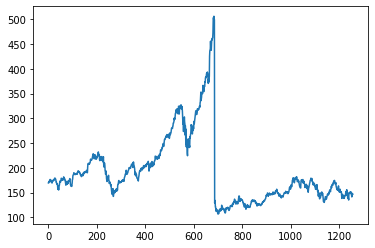

In [62]:
import matplotlib.pyplot as plt 
plt.plot(df1)

In [63]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [64]:
print(df1)

[[0.15649343]
 [0.15661866]
 [0.16488416]
 ...
 [0.10386976]
 [0.10261741]
 [0.09966187]]


In [65]:
#Splitting dataset into train and test split 
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [83]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [84]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [85]:
X_train.shape

(716, 100)

In [86]:
y_train.shape

(716,)

In [87]:
X_test.shape

(339, 100)

In [88]:
#reshape input to be [samples,time steps,features] which is required for LSTM 
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [89]:
#Create the Stacked LSTM model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM

In [90]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [91]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
12/12 [==============================] - 55s 370ms/step - loss: 0.0401 - val_loss: 7.3753e-04
Epoch 2/50
12/12 [==============================] - 2s 174ms/step - loss: 0.0143 - val_loss: 0.0041
Epoch 3/50
12/12 [==============================] - 2s 165ms/step - loss: 0.0109 - val_loss: 4.2113e-04
Epoch 4/50
12/12 [==============================] - 2s 165ms/step - loss: 0.0094 - val_loss: 4.7343e-04
Epoch 5/50
12/12 [==============================] - 2s 167ms/step - loss: 0.0086 - val_loss: 0.0011
Epoch 6/50
12/12 [==============================] - 2s 169ms/step - loss: 0.0084 - val_loss: 5.2241e-04
Epoch 7/50
12/12 [==============================] - 2s 166ms/step - loss: 0.0071 - val_loss: 7.7856e-04
Epoch 8/50
12/12 [==============================] - 2s 166ms/step - loss: 0.0067 - val_loss: 9.6955e-04
Epoch 9/50
12/12 [==============================] - 2s 163ms/step - loss: 0.0061 - val_loss: 3.3631e-04
Epoch 10/50
12/12 [==============================] - 2s 167ms/step - lo

In [93]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 31ms/step


In [94]:
#Transform to Original form of Data
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [95]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,test_predict))


151.39737176366071

In [96]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_train,train_predict))

223.6743879976322

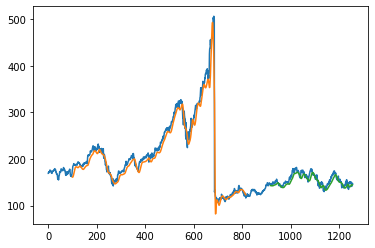

In [97]:
#Plotting
#shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [98]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [99]:
temp_input=list(x_input)

In [100]:
temp_input

[array([0.10076393, 0.11060739, 0.11571697, 0.12150282, 0.1183469 ,
        0.11549155, 0.11211021, 0.12510958, 0.12651221, 0.13943644,
        0.13693175, 0.1331747 , 0.14850344, 0.14770194, 0.14654978,
        0.14534753, 0.14547276, 0.15629305, 0.15441453, 0.16345648,
        0.1661866 , 0.16578585, 0.16959299, 0.16859111, 0.16200376,
        0.15211021, 0.15125861, 0.15201002, 0.15827176, 0.14221666,
        0.13660614, 0.13041954, 0.1261866 , 0.12804008, 0.12265498,
        0.11944897, 0.12303068, 0.11927364, 0.1265623 , 0.14174076,
        0.11772073, 0.12140263, 0.11403882, 0.10985598, 0.11932373,
        0.1253851 , 0.11742016, 0.11496556, 0.10917971, 0.11003131,
        0.11251096, 0.10770194, 0.08926738, 0.07854728, 0.08919224,
        0.09833438, 0.09908579, 0.09665623, 0.08328115, 0.0841077 ,
        0.08050094, 0.07889793, 0.09054477, 0.07899812, 0.08909205,
        0.09244834, 0.09272386, 0.09154665, 0.10126487, 0.10672511,
        0.11396368, 0.10647464, 0.09507827, 0.12

In [101]:
temp_input[0]

array([0.10076393, 0.11060739, 0.11571697, 0.12150282, 0.1183469 ,
       0.11549155, 0.11211021, 0.12510958, 0.12651221, 0.13943644,
       0.13693175, 0.1331747 , 0.14850344, 0.14770194, 0.14654978,
       0.14534753, 0.14547276, 0.15629305, 0.15441453, 0.16345648,
       0.1661866 , 0.16578585, 0.16959299, 0.16859111, 0.16200376,
       0.15211021, 0.15125861, 0.15201002, 0.15827176, 0.14221666,
       0.13660614, 0.13041954, 0.1261866 , 0.12804008, 0.12265498,
       0.11944897, 0.12303068, 0.11927364, 0.1265623 , 0.14174076,
       0.11772073, 0.12140263, 0.11403882, 0.10985598, 0.11932373,
       0.1253851 , 0.11742016, 0.11496556, 0.10917971, 0.11003131,
       0.11251096, 0.10770194, 0.08926738, 0.07854728, 0.08919224,
       0.09833438, 0.09908579, 0.09665623, 0.08328115, 0.0841077 ,
       0.08050094, 0.07889793, 0.09054477, 0.07899812, 0.08909205,
       0.09244834, 0.09272386, 0.09154665, 0.10126487, 0.10672511,
       0.11396368, 0.10647464, 0.09507827, 0.12247965, 0.11646

In [102]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [104]:
len(temp_input)

99

In [108]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((0,99,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


0 day input [0.14221666 0.13660614 0.13041954 0.1261866  0.12804008 0.12265498
 0.11944897 0.12303068 0.11927364 0.1265623  0.14174076 0.11772073
 0.12140263 0.11403882 0.10985598 0.11932373 0.1253851  0.11742016
 0.11496556 0.10917971 0.11003131 0.11251096 0.10770194 0.08926738
 0.07854728 0.08919224 0.09833438 0.09908579 0.09665623 0.08328115
 0.0841077  0.08050094 0.07889793 0.09054477 0.07899812 0.08909205
 0.09244834 0.09272386 0.09154665 0.10126487 0.10672511 0.11396368
 0.10647464 0.09507827 0.12247965 0.11646838 0.10973075 0.09565435
 0.08025047 0.07899812 0.08035066 0.08180338 0.07020664 0.10026299
 0.10735128 0.10379461 0.10820288 0.10507201 0.10990607 0.11133375
 0.10311835 0.10855354 0.11078272 0.10336882 0.09362555 0.08598622
 0.10316844 0.10386976 0.10261741 0.09966187 0.0932681  0.0932681
 0.09170499 0.09064289 0.08943857 0.0881374  0.08677946 0.08539635
 0.08401126 0.08264028 0.0812941  0.0799794  0.07870008 0.07745801
 0.07625376 0.07508697 0.07395673 0.07286172 0.0718

In [109]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [110]:
import matplotlib.pyplot as plt

In [111]:

len(df1)

1257

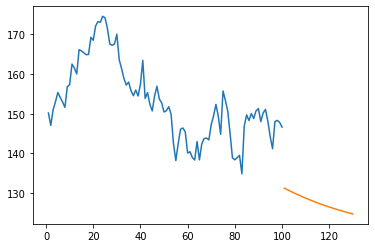

In [112]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

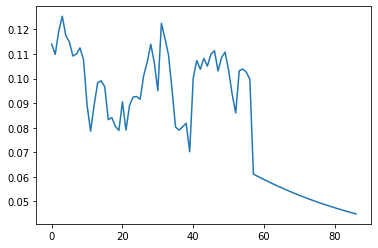

In [113]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])